<a href="https://colab.research.google.com/github/XM2202-02/CNN-FaceEmo/blob/main/FACEipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.utils import load_img, img_to_array
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense,Dropout

In [ ]:
datagen = ImageDataGenerator(rescale=1./255)
generator= datagen.flow_from_directory(
    '/content/drive/MyDrive/Face Rec',
    target_size=(32, 32),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=42
)
test_generator = datagen.flow_from_directory(
    '/content/drive/MyDrive/Face Rec',
    target_size=(32, 32),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=False,
    seed=42
)
class_label=['Elon Musk','Miss TThuy','Misthy','Quan0go','The Weeknd','Tlinh']
X_batch,y_batch= next(generator)
X_batch_flat=X_batch.reshape(X_batch.shape[0],-1)
x_train, y_train = next(generator)
x_test, y_test = next(test_generator)
x_train = x_train.reshape(x_train.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)
print('Nhap vao:', X_batch_flat.shape)
print('Ket qua:', y_batch.shape)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

Found 31 images belonging to 6 classes.
Found 31 images belonging to 6 classes.
Nhap vao: (31, 3072)
Ket qua: (31, 6)
(31, 3072) (31, 6)
(31, 3072) (31, 6)


In [ ]:
model = Sequential([
    Dense(256, activation='relu', input_shape=(32*32*3,)),
    Dense(128, activation='relu'),
    Dense(6, activation='softmax')
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=100, batch_size=32, validation_data=(x_test, y_test))
test_loss, test_acc = model.evaluate(x_test, y_test)
print('test_acc:%.2f'%(test_acc))
generator.class_indices

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.1613 - loss: 2.1637 - val_accuracy: 0.1613 - val_loss: 2.9953
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step - accuracy: 0.1613 - loss: 2.9953 - val_accuracy: 0.2581 - val_loss: 2.1344
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 323ms/step - accuracy: 0.2581 - loss: 2.1344 - val_accuracy: 0.2258 - val_loss: 2.3892
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 284ms/step - accuracy: 0.2258 - loss: 2.3892 - val_accuracy: 0.3871 - val_loss: 1.8586
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step - accuracy: 0.3871 - loss: 1.8586 - val_accuracy: 0.2903 - val_loss: 1.6133
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 323ms/step - accuracy: 0.2903 - loss: 1.6133 - val_accuracy: 0.5484 - val_loss: 1.3416
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 330ms/step - accuracy: 0.5484 - loss: 1.3416 - val_accuracy: 0.5806 - val_loss: 1.3541
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 672ms/step - accuracy: 0.5806 - loss: 1.3541 - val_accuracy: 0.4194 - val_

{'Elon Musk': 0,
 'Miss TThuy': 1,
 'Misthy': 2,
 'Quan0go': 3,
 'The Weeknd': 4,
 'Tlinh': 5}

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
Dự đoán: Elon Musk


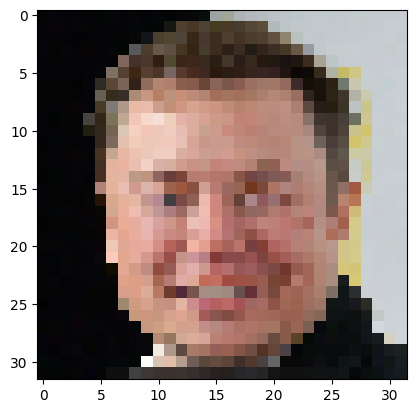

In [ ]:
img=load_img('/content/drive/MyDrive/Face Rec/Elon Musk/Ảnh chụp màn hình 2025-04-13 133516.png', target_size=(32,32))
plt.imshow(img)
img=img_to_array(img)
img_flatten=img.reshape(1,32*32*3)
img = img_to_array(img)
img_flatten = img_flatten.astype('float32') / 255
y_pred_prob = model.predict(img_flatten)
predicted_class_index = int(np.argmax(y_pred_prob))
class_labels = list(generator.class_indices.keys())
print("Dự đoán:", class_labels[predicted_class_index])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
Dự đoán: Miss TThuy


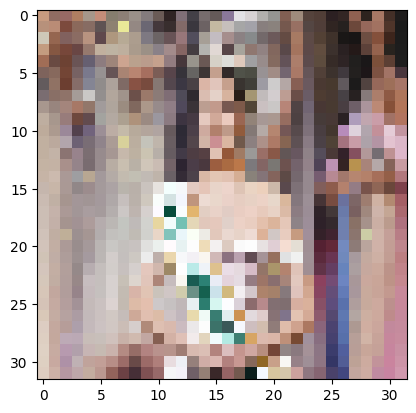

In [ ]:
img=load_img('/content/drive/MyDrive/Face Rec/Miss TThuy/Ảnh chụp màn hình 2025-04-13 133639.png', target_size=(32,32))
plt.imshow(img)
img=img_to_array(img)
img_flatten=img.reshape(1,32*32*3)
img = img_to_array(img)
img_flatten = img_flatten.astype('float32') / 255
y_pred_prob = model.predict(img_flatten)
predicted_class_index = int(np.argmax(y_pred_prob))
class_labels = list(generator.class_indices.keys())
print("Dự đoán:", class_labels[predicted_class_index])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
Dự đoán: Misthy


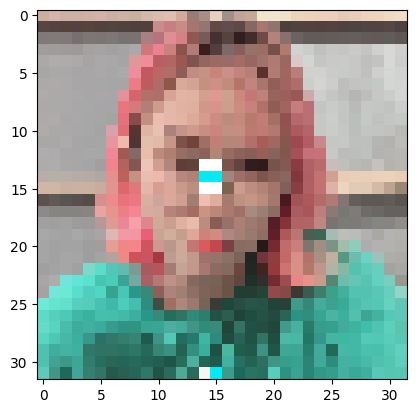

In [ ]:
img=load_img('/content/drive/MyDrive/Face Rec/Misthy/Ảnh chụp màn hình 2025-04-13 133900.png', target_size=(32,32))
plt.imshow(img)
img=img_to_array(img)
img_flatten=img.reshape(1,32*32*3)
img = img_to_array(img)
img_flatten = img_flatten.astype('float32') / 255
y_pred_prob = model.predict(img_flatten)
predicted_class_index = int(np.argmax(y_pred_prob))
class_labels = list(generator.class_indices.keys())
print("Dự đoán:", class_labels[predicted_class_index])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
Dự đoán: Quan0go


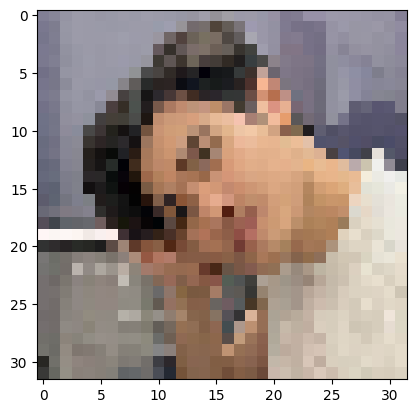

In [ ]:
img=load_img('/content/drive/MyDrive/Face Rec/Quan0go/Ảnh chụp màn hình 2025-04-13 134010.png', target_size=(32,32))
plt.imshow(img)
img=img_to_array(img)
img_flatten=img.reshape(1,32*32*3)
img = img_to_array(img)
img_flatten = img_flatten.astype('float32') / 255
y_pred_prob = model.predict(img_flatten)
predicted_class_index = int(np.argmax(y_pred_prob))
class_labels = list(generator.class_indices.keys())
print("Dự đoán:", class_labels[predicted_class_index])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
Dự đoán: The Weeknd


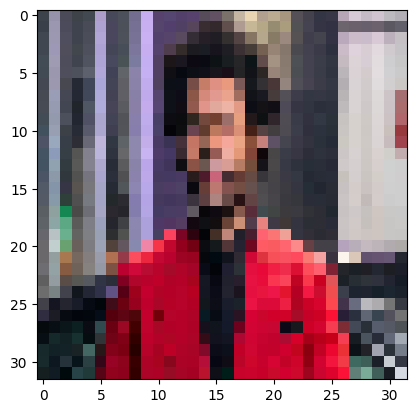

In [ ]:
img=load_img('/content/drive/MyDrive/Face Rec/The Weeknd/Ảnh chụp màn hình 2025-04-13 133743.png', target_size=(32,32))
plt.imshow(img)
img=img_to_array(img)
img_flatten=img.reshape(1,32*32*3)
img = img_to_array(img)
img_flatten = img_flatten.astype('float32') / 255
y_pred_prob = model.predict(img_flatten)
predicted_class_index = int(np.argmax(y_pred_prob))
class_labels = list(generator.class_indices.keys())
print("Dự đoán:", class_labels[predicted_class_index])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
Dự đoán: Tlinh


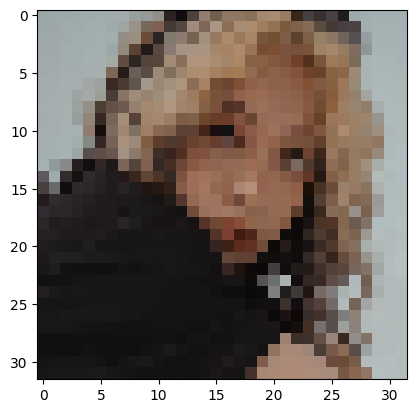

In [ ]:
img=load_img('/content/drive/MyDrive/Face Rec/Tlinh/Ảnh chụp màn hình 2025-04-13 134126.png', target_size=(32,32))
plt.imshow(img)
img=img_to_array(img)
img_flatten=img.reshape(1,32*32*3)
img = img_to_array(img)
img_flatten = img_flatten.astype('float32') / 255
y_pred_prob = model.predict(img_flatten)
predicted_class_index = int(np.argmax(y_pred_prob))
class_labels = list(generator.class_indices.keys())
print("Dự đoán:", class_labels[predicted_class_index])

In [ ]:
model.save('trainAI.h5')